In [1]:
import numpy
from scipy import linalg
from matplotlib import pyplot
%matplotlib inline

In [52]:
L = 1.0
nx =51
dx = L / (nx - 1)
x = numpy.linspace(0.0,L,num = nx)
alpha = 1.22e-3
T0 = numpy.zeros(nx)
T0[0] = 100.0

In [53]:
def solve_1d(T0,nt,dt,dx,alpha,cE,cI,bc):
    T = T0.copy()
    N = len(T0) - 2
    A, b_bc = lhs_operator(N,dt,dx,alpha,cI)
    for n in range (nt):
        b = rhs_vector(T,dt,dx,alpha,cE)
        T[1:-1] = linalg.solve(A,b)
        update_boundaries(T,dx,bc)
    return T

In [54]:
def lhs_operator(N,dt,dx,alpha,cI):
    I = numpy.identity(N)
    L, b_bc = laplacian_1d(N,dx)
    A = I/dt - cI * alpha * L
    return A, b_bc

In [55]:
def rhs_vector(T,dt,dx,alpha,cE):
    b = T[1:-1]/dt+cE*alpha*(T[:-2]-2*T[1:-1]+T[2:])/dx**2
    return b

In [56]:
def update_boundaries(T,dx,bc):
    T[0] = get_bundary_value(T[1],dx,bc['left'])
    T[-1] = get_bundary_value(T[-2],dx,bc['right'])
    return

In [57]:
def laplacian_1d(N,dx):
    D = numpy.diag(-2.0/dx**2*numpy.ones(N))
    L = numpy.diag(1.0/dx**2*numpy.ones(N-1),k=-1)
    U = numpy.diag(1.0/dx**2*numpy.ones(N-1),k=+1)
    A = D + U + L
    b_bc = numpy.zeros(N)
    
    if bc['left']['type'] == 'Dirichlet':
        b_bc[0] = bc['left']['value']/dx**2
    elif bc['left']['type'] == 'Neumann':
        A[0,0] = -1.0 / dx**2
        b_bc[0]= bc['left']['value']/dx
        
    if bc['right']['type'] == 'Dirichlet':
        b_bc[0] = bc['right']['value']/dx**2
    elif bc['right']['type'] == 'Neumann':
        A[-1,-1] = -1.0 / dx**2
        b_bc[0]= bc['right']['value']/dx
        

    return A, b_bc

In [58]:
bc_left = {'type':'Dirichlet','value':100.0}
bc_right = {'type':'Neumann','value':0.0}
bc = {'left':bc_left,'right':bc_right}
print(bc_left['type'])
print(bc['left']['type'])

Dirichlet
Dirichlet


In [68]:
def get_bundary_value(T_neighbor,dx,bc):
    if bc['type'] == 'Dirichlet':
        return bc['value']
    elif bc['type'] == 'Neumann':
        return T_neighbor + bc['value']*dx
    else:
        raise ValueError('only D and N are supported')
        return 


In [75]:
sigma = 0.5
dt = sigma * dx**2 / alpha
nt = 100
T = solve_1d(T0,nt,dt,dx,alpha,1,0,bc)

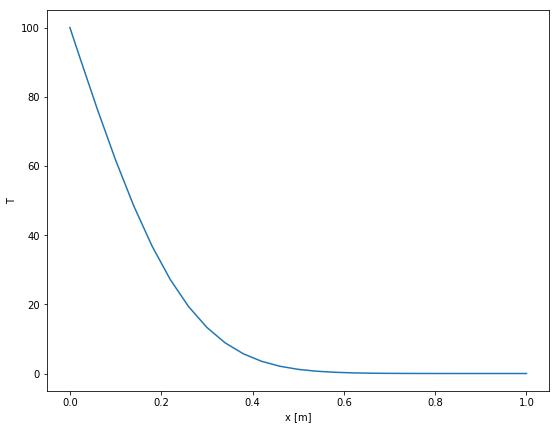

In [76]:
pyplot.figure(figsize=(9.0,7.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('T')
pyplot.plot(x,T)